<a href="https://colab.research.google.com/github/MrJenish/woc5.0-ml-weather-prediction-case-study-Jenish-Mangukiya/blob/main/WOC5_0_ML_Checkpoint_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Pyhton library**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

**Import Data set**

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weather.csv")

In [3]:
df.shape

(1461, 5)

In [4]:
df.weather.value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [5]:
df.weather.replace(['drizzle','rain','sun','snow','fog'],[0,1,2,3,4],inplace=True)

In [6]:
df.weather.value_counts()

1    641
2    640
4    101
0     53
3     26
Name: weather, dtype: int64

**Define input features and traget value**

In [7]:
input = df.drop(['weather'],axis=1)
output = df.weather

**Split the data into train and test set**

In [8]:
x_train, x_test, y_train, y_test = train_test_split(input,output,test_size=0.2,random_state=42)

In [9]:
print('x_train size : ',str(x_train.shape))
print('x_test size : ',str(x_test.shape))
print('y_train size : ',str(y_train.shape))
print('y_test size : ',str(y_test.shape))

x_train size :  (1168, 4)
x_test size :  (293, 4)
y_train size :  (1168,)
y_test size :  (293,)


**K_Nearest Neighbors function return the no_neighbors and accurancy in the form of array**

In [10]:
def K_Nearest_Neighbors(x_train,x_test,y_train,y_test,weight):

  no_neighbors = []
  accurancy = []

  for i in range(1,50):
    model = KNeighborsClassifier(n_neighbors=i,weights=weight)
    model.fit(x_train,y_train)
    curr_accurancy = model.score(x_test,y_test)*100
    no_neighbors.append(i)
    accurancy.append(curr_accurancy)

  no_neighbors = np.array(no_neighbors)
  accurancy = np.array(accurancy)

  return no_neighbors, accurancy

### **Model : 1**

In the this model we use `weights = 'uniform'`

In [11]:
no_neighbors1, accurancy1 = K_Nearest_Neighbors(x_train,x_test,y_train,y_test,'uniform')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accurancy')

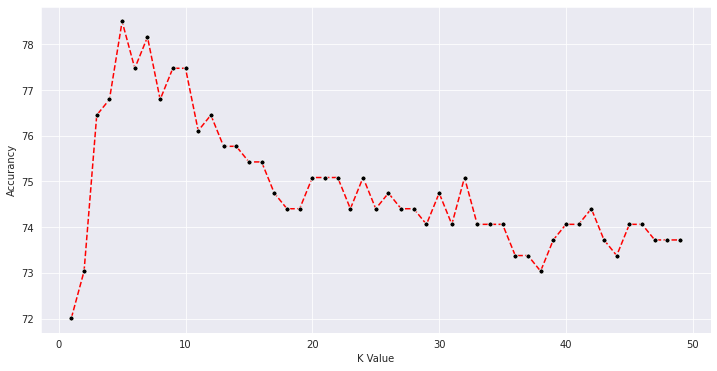

In [12]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.lineplot(no_neighbors1,accurancy1,color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
plt.xlabel('K Value')
plt.ylabel('Accurancy')

### **Model : 2**

In the this model we use `weights = 'distance'`

In [13]:
no_neighbors2, accurancy2 = K_Nearest_Neighbors(x_train,x_test,y_train,y_test,'distance')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accurancy')

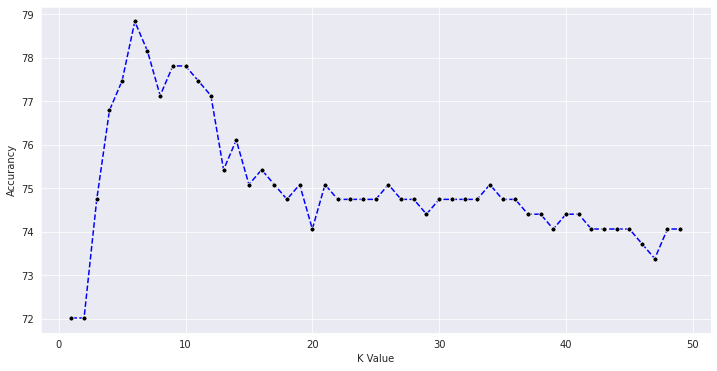

In [14]:
plt.figure(figsize=(12, 6))
sns.lineplot(no_neighbors2,accurancy2,color='blue', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
plt.xlabel('K Value')
plt.ylabel('Accurancy')

### **Comparision between 1st and 2nd model**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accurancy')

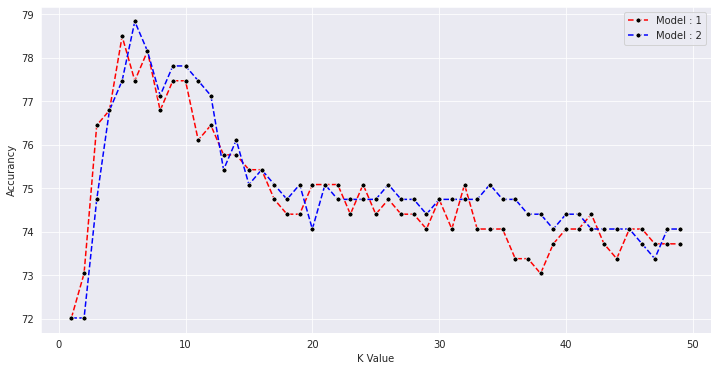

In [15]:
plt.figure(figsize=(12, 6))
sns.lineplot(no_neighbors1,accurancy1,color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
sns.lineplot(no_neighbors2,accurancy2,color='blue', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
plt.legend(labels = ['Model : 1','Model : 2'])
plt.xlabel('K Value')
plt.ylabel('Accurancy')

**Normalize the data**

In [16]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

### **Model : 3**

In this model first we normalize data and use `weights = 'uniform'`

In [17]:
no_neighbors3, accurancy3 = K_Nearest_Neighbors(x_train,x_test,y_train,y_test,'uniform')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accurancy')

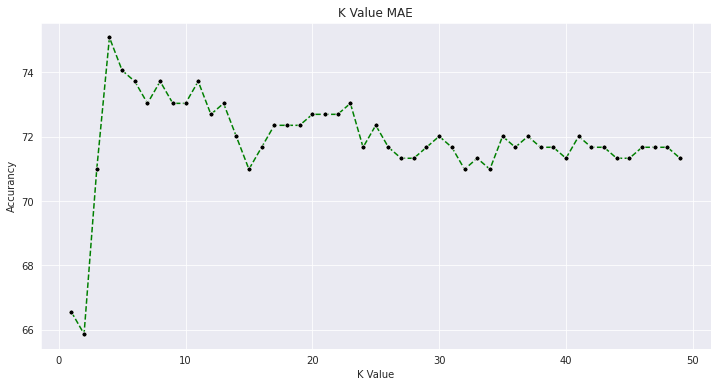

In [18]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.lineplot(no_neighbors3,accurancy3,color='green', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
plt.title('K Value MAE')
plt.xlabel('K Value')
plt.ylabel('Accurancy')

### **Model : 4**

In this model first we normalize data and use `weights = 'distance'`

In [19]:
no_neighbors4, accurancy4 = K_Nearest_Neighbors(x_train,x_test,y_train,y_test,'distance')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accurancy')

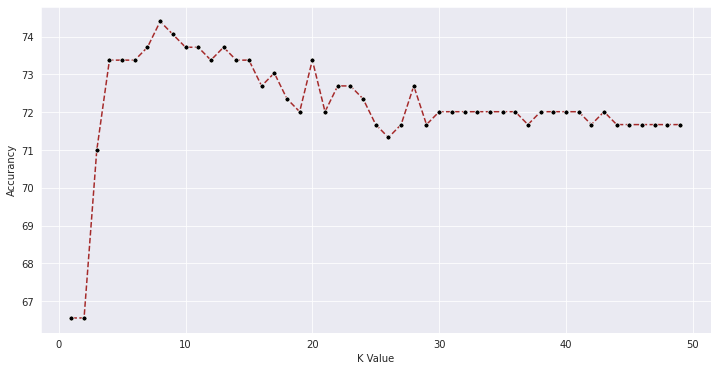

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(no_neighbors4,accurancy4,color='brown', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
plt.xlabel('K Value')
plt.ylabel('Accurancy')

### **Comparision between 3rd and 4th model**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accurancy')

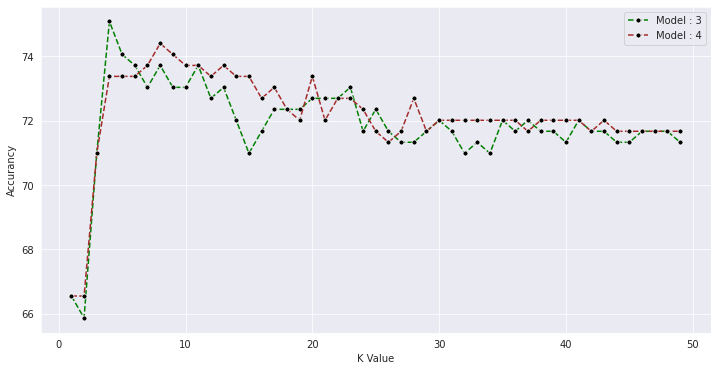

In [21]:
plt.figure(figsize=(12, 6))
sns.lineplot(no_neighbors3,accurancy3,color='green', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
sns.lineplot(no_neighbors4,accurancy4,color='brown', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
plt.legend(labels = ['Model : 3','Model : 4'])
plt.xlabel('K Value')
plt.ylabel('Accurancy')

### **Comparision between all model**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

Text(0, 0.5, 'Accurancy')

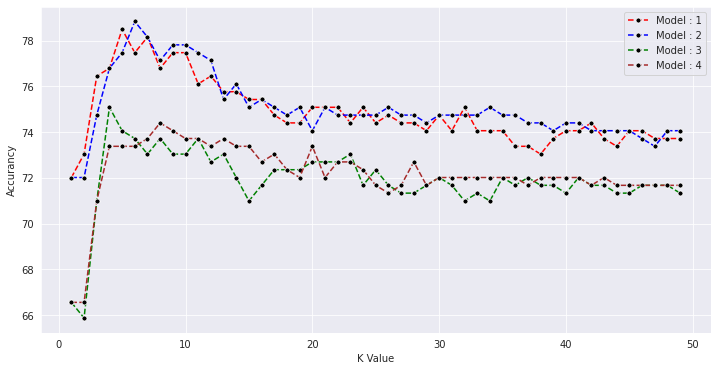

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(no_neighbors1,accurancy1,color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
sns.lineplot(no_neighbors2,accurancy2,color='blue', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
sns.lineplot(no_neighbors3,accurancy3,color='green', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
sns.lineplot(no_neighbors4,accurancy4,color='brown', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
plt.legend(labels = ['Model : 1','Model : 2','Model : 3','Model : 4'])
plt.xlabel('K Value')
plt.ylabel('Accurancy')

### **Remove outliers**

In [23]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [24]:
df.shape

(1132, 5)

In [25]:
input = df.drop(['weather'],axis=1)
output = df.weather

In [26]:
x_train, x_test, y_train, y_test = train_test_split(input,output,test_size=0.2,random_state=42)

In [27]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [28]:
print('x_train size : ',str(x_train.shape))
print('x_test size : ',str(x_test.shape))
print('y_train size : ',str(y_train.shape))
print('y_test size : ',str(y_test.shape))

x_train size :  (905, 4)
x_test size :  (227, 4)
y_train size :  (905,)
y_test size :  (227,)


### **Model : 5**

In the this model first remove outliers then normalize our data and use `weights = 'uniform'`

In [29]:
no_neighbors5, accurancy5 = K_Nearest_Neighbors(x_train,x_test,y_train,y_test,'uniform')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accurancy')

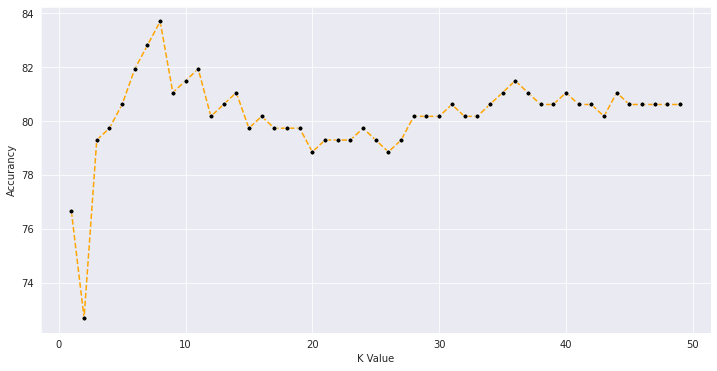

In [30]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.lineplot(no_neighbors5,accurancy5,color='orange', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
plt.xlabel('K Value')
plt.ylabel('Accurancy')

### **Model : 6**

In the this model first remove outliers then normalize our data and use `weights = 'distance'`

In [31]:
no_neighbors6, accurancy6 = K_Nearest_Neighbors(x_train,x_test,y_train,y_test,'distance')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accurancy')

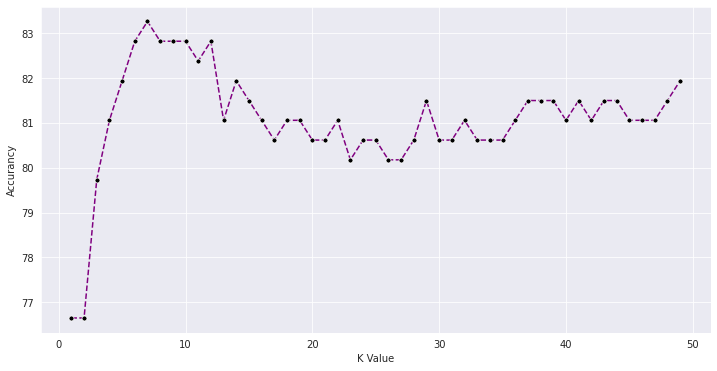

In [32]:
sns.set_style('darkgrid')
plt.figure(figsize=(12, 6))
sns.lineplot(no_neighbors6,accurancy6,color='purple', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
plt.xlabel('K Value')
plt.ylabel('Accurancy')

### **Comparision between 5th and 6th model**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Accurancy')

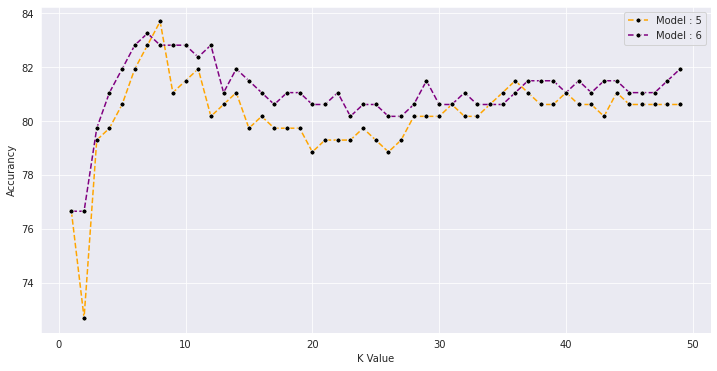

In [33]:
plt.figure(figsize=(12, 6))
sns.lineplot(no_neighbors5,accurancy5,color='orange', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
sns.lineplot(no_neighbors6,accurancy6,color='purple', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
plt.legend(labels = ['Model : 5','Model : 6'])
plt.xlabel('K Value')
plt.ylabel('Accurancy')

### **Comparision between all model**

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

Text(0, 0.5, 'Accurancy')

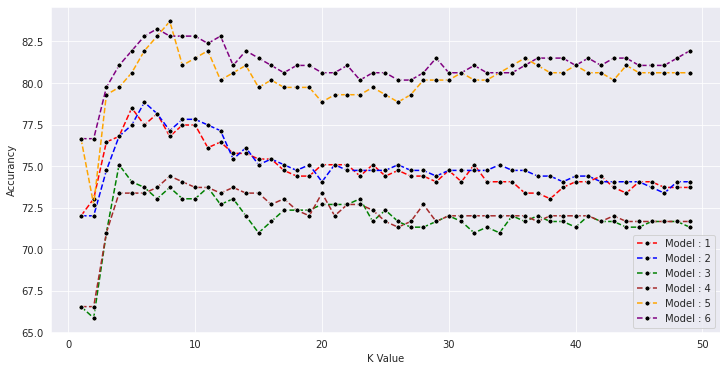

In [34]:
plt.figure(figsize=(12, 6))
sns.lineplot(no_neighbors1,accurancy1,color='red', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
sns.lineplot(no_neighbors2,accurancy2,color='blue', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
sns.lineplot(no_neighbors3,accurancy3,color='green', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
sns.lineplot(no_neighbors4,accurancy4,color='brown', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
sns.lineplot(no_neighbors5,accurancy5,color='orange', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
sns.lineplot(no_neighbors6,accurancy6,color='purple', 
         linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=5)
plt.legend(labels = ['Model : 1','Model : 2','Model : 3','Model : 4','Model : 5','Model : 6'])
plt.xlabel('K Value')
plt.ylabel('Accurancy')